# How well do jobs and skills pay for Data Analysts?

#### Methodology
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

## Import Libraries and Data

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Salary Distribution by Job Title

Filter our data to only include salary values from Italy.

In [3]:
# filter for the job titles and country
df_IT = df[(df['job_country'] == 'Italy')].dropna(subset=['salary_year_avg'])

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [4]:
job_titles = df_IT['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_IT_top6 = df_IT[df_IT['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_IT_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Machine Learning Engineer',
 'Senior Data Analyst',
 'Senior Data Scientist']

## Plot Salary Distributions

Plot the top 6 job titles salary distributions using a box plot.

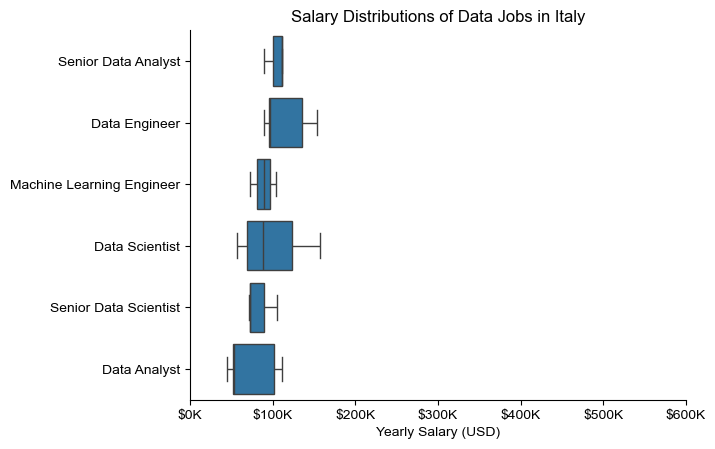

In [5]:
sns.boxplot(data=df_IT_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in Italy')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'Italy', to create a new DataFrame `df_DA_IT`. Drop NaN values from the 'salary_year_avg' column. Then it uses the `explode` method on the `job_skills` column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the `salary_year_avg` and `job_skills` columns.

In [6]:
# Only get data analyst jobs in Italy
df_DA_IT = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Italy')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_IT = df_DA_IT.dropna(subset=['salary_year_avg'])

df_DA_IT = df_DA_IT.explode('job_skills')

df_DA_IT[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
107484,89100.0,r
107484,89100.0,python
107484,89100.0,java
107484,89100.0,flow
122754,53014.0,matlab


## Determine The Highest Paid Skills and Most Demanded Skills

Gets the top ten highest-paying skills for Data Analysts by calculating the median salary for each skill listed in the `df_DA_IT`. It groups the data by job skills, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame (`df_DA_top_pay`) with a reset index and a renamed salary column labeled 'median_salary'.

In [7]:
df_DA_top_pay = df_DA_IT.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
sap,1,111175.0
aws,1,102500.0
azure,1,102500.0
looker,1,102500.0
sql,6,101500.0
crystal,1,100500.0
r,3,100500.0
qlik,1,100500.0
python,7,89100.0


Calculates the count and median salary for each skill in `df_DA_IT`. It groups the data by `job_skills`, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [9]:
df_DA_skills = df_DA_IT.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
aws,1,102500.0
sql,6,101500.0
r,3,100500.0
python,7,89100.0
oracle,2,81094.5
tableau,4,76757.0
bigquery,2,75757.0
java,2,70057.0
spark,1,53014.0


Creates two horizontal bar charts: 
1. Displays the highest paid skills 
2. Shows the most in demand skills 

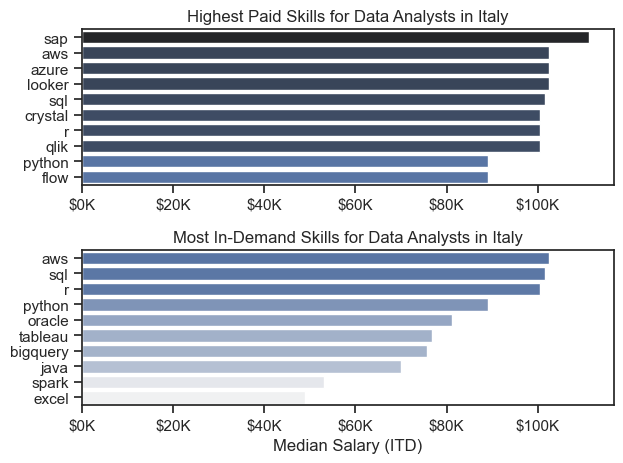

In [11]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analysts in Italy')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Analysts in Italy')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (ITD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()